# Combine Oregon and Washington Landslide Datasets

## Overview
This notebook combines the preprocessed landslide datasets from Oregon and Washington into a unified dataset.


**Prerequisites**: Run Oregon and Washington preprocessing notebooks first

### Key Processing Steps:

1. **Load Preprocessed Data**: Import Oregon and Washington processed GeoJSON files from PreProcessing/ProcessedDataSets

2. **Schema Standardizations**: Standardize column names and data types between the two datasets  

3. **Coordinate System Alignment**: Transform both datasets to a common CRS (EPSG:4326)

4. **Data Integration**: Combine datasets while preserving regional source identifiers

5. **Quality Validation**: Verify data consistency and geographic coverage

6. **Export Combined Dataset**: Save unified Oregon-Washington dataset for next processing steps

# Load Oregon and Washington Pre processed Datasets

In [1]:
import fiona
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
oregon_landslides = gpd.read_file("../PreProcessing/ProcessedDataSets/oregon_landslides_processed.geojson")
print("Loaded GeoDataFrame shape:", oregon_landslides.shape)
oregon_landslides.head()

Loaded GeoDataFrame shape: (71318, 33)


,LANDSLIDE_ID,TYPE_MOVE,MATERIAL,MOVEMENT,MOVE_CODE,CONFIDENCE,RELATIVE_AGE,DATE_MOVE,NAME,GEOL,...,MONTH,DAY,DATE_RANGE,REACTIVATION,Shape_Length,Shape_Area,REFERENCE,DATASET_LINK,ORIGIN,geometry
0,WASH_CO2,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,NaN,NaN,NaN,NaN,447.239405,11291.764767,"Hairston-Porter, R., Madin, I., Burns, W., and...",https://www.oregon.gov/dogami/slido/Pages/data...,OR,"MULTIPOLYGON (((699810.000 1325184.192, 699822..."
1,WASH_CO3,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,NaN,NaN,NaN,NaN,455.775817,13701.014637,"Hairston-Porter, R., Madin, I., Burns, W., and...",https://www.oregon.gov/dogami/slido/Pages/data...,OR,"MULTIPOLYGON (((699860.473 1325401.027, 699873..."
2,WASH_CO4,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,NaN,NaN,NaN,NaN,568.959463,14879.315815,"Hairston-Porter, R., Madin, I., Burns, W., and...",https://www.oregon.gov/dogami/slido/Pages/data...,OR,"MULTIPOLYGON (((700295.984 1325083.866, 700283..."
3,WASH_CO5,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,sed.Q.qsd.mf.nd.nd.fine,...,NaN,NaN,NaN,NaN,591.097110,20034.804942,"Hairston-Porter, R., Madin, I., Burns, W., and...",https://www.oregon.gov/dogami/slido/Pages/data...,OR,"MULTIPOLYGON (((700696.889 1325351.537, 700659..."
4,WASH_CO6,Flow,Debris,Flow,DFL,High,Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,...,NaN,NaN,NaN,NaN,391.627031,8462.716893,"Hairston-Porter, R., Madin, I., Burns, W., and...",https://www.oregon.gov/dogami/slido/Pages/data...,OR,"MULTIPOLYGON (((699242.636 1321687.547, 699279..."


In [13]:
washington_landslides = gpd.read_file("../PreProcessing/ProcessedDataSets/washington_landslides_processed.geojson")
print("Loaded GeoDataFrame shape:", washington_landslides.shape)
washington_landslides.head()

Loaded GeoDataFrame shape: (73471, 20)


,LANDSLIDE_ID,MATERIAL,MOVEMENT,MOVE_CODE,CONFIDENCE,RELATIVE_AGE,YEAR,SLOPE,HS_HEIGHT,FAIL_DEPTH,MVMT_AZIMUTH_DEG,VOLUME,AVG_SCARP_DIST_FT,NAME,Shape_Length,Shape_Area,Reference,ORIGIN,DATASET_LINK,geometry
0,18414,Earth or debris,Flow,EFL,Low (1-10),Pre-historic (>150 years),NaN,11.0,3.0,3.0,225.0,1322.894339,NaN,NaN,82.334854,440.966914,WGS,WASHINGTON,https://dnr.wa.gov/washington-geological-surve...,"MULTIPOLYGON (((1043516.638 614643.978, 104351..."
1,20629,Earth or debris,Complex,ES-R+EFL,Low (1-10),Pre-historic (>150 years),NaN,39.0,11.0,9.0,180.0,4039.516598,NaN,NaN,77.534531,441.695598,WGS,WASHINGTON,https://dnr.wa.gov/washington-geological-surve...,None
2,20630,Earth or debris,Complex,ES-R+EFL,Low (1-10),Pre-historic (>150 years),NaN,37.0,11.0,9.0,180.0,4563.138478,NaN,NaN,81.931760,483.669276,WGS,WASHINGTON,https://dnr.wa.gov/washington-geological-surve...,None
3,20661,Earth or debris,Topple,ET,Moderate (11-29),Pre-historic (>150 years),NaN,61.0,24.0,12.0,225.0,6320.755277,NaN,NaN,85.493104,509.669212,WGS,WASHINGTON,https://dnr.wa.gov/washington-geological-surve...,"MULTIPOLYGON (((1032543.812 660981.578, 103254..."
4,20594,Earth or debris,Topple,ET,Moderate (11-29),Pre-historic (>150 years),NaN,33.0,29.0,24.0,135.0,13016.550042,NaN,NaN,91.365031,528.125198,WGS,WASHINGTON,https://dnr.wa.gov/washington-geological-surve...,None


# Rename Columns to be more consistent

## Oregon

In [4]:
print(oregon_landslides.dtypes)

LANDSLIDE_ID           object
TYPE_MOVE              object
MATERIAL               object
MOVEMENT               object
MOVE_CODE              object
CONFIDENCE             object
RELATIVE_AGE           object
DATE_MOVE              object
NAME                   object
GEOL                   object
SLOPE                 float64
HS_HEIGHT             float64
FAN_HEIGHT            float64
FAIL_DEPTH            float64
DEEP_SHAL              object
AVG_SCARP_DIST_FT     float64
MVMT_AZIMUTH_DEG      float64
AREA                  float64
VOL                   float64
REF_ID_COD             object
MAP_UNIT_L             object
DESCRIPTION            object
YEAR                  float64
MONTH                  object
DAY                    object
DATE_RANGE             object
REACTIVATION           object
Shape_Length          float64
Shape_Area            float64
REFERENCE              object
DATASET_LINK           object
ORIGIN                 object
geometry             geometry
dtype: obj

We will rename 5 Columns in the Oregon Processed Dataset to make it more consistent with Washington. 

In [14]:
oregon_column_mapping = {
    'UNIQUE_ID': 'LANDSLIDE_ID',
    'AGE': 'RELATIVE_AGE',
    'SLOPE_DEG': 'SLOPE',
    'HD_AVE': 'AVG_SCARP_DIST_FT',
    'DIRECT': 'MVMT_AZIMUTH_DEG',
    'REFERENCE': 'Reference'
}


In [15]:
oregon_landslides.rename(columns=oregon_column_mapping, inplace=True)

In [ ]:
# oregon_landslides['original_dataset'] = 'OR'

In [16]:
oregon_landslides.dtypes

LANDSLIDE_ID           object
TYPE_MOVE              object
MATERIAL               object
MOVEMENT               object
MOVE_CODE              object
CONFIDENCE             object
RELATIVE_AGE           object
DATE_MOVE              object
NAME                   object
GEOL                   object
SLOPE                 float64
HS_HEIGHT             float64
FAN_HEIGHT            float64
FAIL_DEPTH            float64
DEEP_SHAL              object
AVG_SCARP_DIST_FT     float64
MVMT_AZIMUTH_DEG      float64
AREA                  float64
VOL                   float64
REF_ID_COD             object
MAP_UNIT_L             object
DESCRIPTION            object
YEAR                  float64
MONTH                  object
DAY                    object
DATE_RANGE             object
REACTIVATION           object
Shape_Length          float64
Shape_Area            float64
Reference              object
DATASET_LINK           object
ORIGIN                 object
geometry             geometry
dtype: obj

## Washington

In [17]:
print(washington_landslides.dtypes)

LANDSLIDE_ID            int64
MATERIAL               object
MOVEMENT               object
MOVE_CODE              object
CONFIDENCE             object
RELATIVE_AGE           object
YEAR                   object
SLOPE                 float64
HS_HEIGHT             float64
FAIL_DEPTH            float64
MVMT_AZIMUTH_DEG      float64
VOLUME                float64
AVG_SCARP_DIST_FT     float64
NAME                   object
Shape_Length          float64
Shape_Area            float64
Reference              object
ORIGIN                 object
DATASET_LINK           object
geometry             geometry
dtype: object


We will rename 6 Columns in the Oregon Processed Dataset to make it more consistent with Washington. 

In [18]:
washington_column_mapping = {
    'YEAR_MOVE': 'YEAR',
    'SLOPE_DEG': 'SLOPE',
    'HS_HEIGHT_FT': 'HS_HEIGHT',
    'FAIL_DEPTH_FT': 'FAIL_DEPTH',
    'VOLUME_FT3': 'VOLUME',
    'LS_NAME': 'NAME'
}

In [19]:
washington_landslides.rename(columns=washington_column_mapping, inplace=True)

In [ ]:
# washington_landslides['original_dataset'] = 'WA'

In [20]:
washington_landslides.dtypes

LANDSLIDE_ID            int64
MATERIAL               object
MOVEMENT               object
MOVE_CODE              object
CONFIDENCE             object
RELATIVE_AGE           object
YEAR                   object
SLOPE                 float64
HS_HEIGHT             float64
FAIL_DEPTH            float64
MVMT_AZIMUTH_DEG      float64
VOLUME                float64
AVG_SCARP_DIST_FT     float64
NAME                   object
Shape_Length          float64
Shape_Area            float64
Reference              object
ORIGIN                 object
DATASET_LINK           object
geometry             geometry
dtype: object

# Combine Loaded DataSets

In [21]:
print("Oregon Landslides CRS:", oregon_landslides.crs)
print("Washington Landslides CRS:", washington_landslides.crs)

Oregon Landslides CRS: EPSG:2994
Washington Landslides CRS: EPSG:2927


Due to the conflict in CRS of the Oregon and Washington Dataset, we choose a common CRS for the new combined dataset.

In [22]:
oregon_transformed = oregon_landslides.to_crs("EPSG:4326")
washington_transformed = washington_landslides.to_crs("EPSG:4326")

In [23]:
all_columns = list(set(oregon_transformed.columns).union(set(washington_transformed.columns)))
oregon_reindexed = oregon_transformed.reindex(columns=all_columns)
washington_reindexed = washington_transformed.reindex(columns=all_columns)
merged_landslides = pd.concat([oregon_reindexed, washington_reindexed], ignore_index=True)

In [24]:
merged_landslides.head()

,VOLUME,HS_HEIGHT,VOL,LANDSLIDE_ID,NAME,DESCRIPTION,TYPE_MOVE,YEAR,DEEP_SHAL,DAY,...,MONTH,DATASET_LINK,REF_ID_COD,Shape_Length,Shape_Area,MOVE_CODE,AREA,FAIL_DEPTH,RELATIVE_AGE,MVMT_AZIMUTH_DEG
0,NaN,0.0,11291.700195,WASH_CO2,,Fan,Flow,NaN,,NaN,...,NaN,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,447.239405,11291.764767,DFL,11291.700195,0.0,Historic (<150yrs),0.0
1,NaN,0.0,13701.000000,WASH_CO3,,Fan,Flow,NaN,,NaN,...,NaN,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,455.775817,13701.014637,DFL,13701.000000,0.0,Historic (<150yrs),180.0
2,NaN,0.0,19839.000000,WASH_CO4,,Fan,Flow,NaN,,NaN,...,NaN,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,568.959463,14879.315815,DFL,14879.299805,0.0,Historic (<150yrs),337.5
3,NaN,0.0,53425.898438,WASH_CO5,,Fan,Flow,NaN,,NaN,...,NaN,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,591.097110,20034.804942,DFL,20034.699219,0.0,Historic (<150yrs),315.0
4,NaN,0.0,22567.199219,WASH_CO6,,Fan,Flow,NaN,,NaN,...,NaN,https://www.oregon.gov/dogami/slido/Pages/data...,HairRW2021,391.627031,8462.716893,DFL,8462.679688,0.0,Historic (<150yrs),270.0


In [25]:
merged_landslides.dtypes

VOLUME                float64
HS_HEIGHT             float64
VOL                   float64
LANDSLIDE_ID           object
NAME                   object
DESCRIPTION            object
TYPE_MOVE              object
YEAR                   object
DEEP_SHAL              object
DAY                    object
MATERIAL               object
GEOL                   object
Reference              object
CONFIDENCE             object
ORIGIN                 object
REACTIVATION           object
MAP_UNIT_L             object
FAN_HEIGHT            float64
DATE_MOVE              object
MOVEMENT               object
DATE_RANGE             object
AVG_SCARP_DIST_FT     float64
SLOPE                 float64
geometry             geometry
MONTH                  object
DATASET_LINK           object
REF_ID_COD             object
Shape_Length          float64
Shape_Area            float64
MOVE_CODE              object
AREA                  float64
FAIL_DEPTH            float64
RELATIVE_AGE           object
MVMT_AZIMU

# Save the Merged Dataset

In [26]:
merged_landslides.to_file("./or_wa_merged_landslides.geojson", driver="GeoJSON")

In [19]:
merged_landslides.to_csv("./or_wa_merged_landslides.csv", index=False)

# Inspect the Merged Dataset

In [27]:
print(merged_landslides.shape)

(144789, 34)


In [28]:
import pandas as pd

def completeness(df: pd.DataFrame):
    total = len(df)
    comp = df.count()               # non-null counts per column
    pct = (comp / total * 100).round(1)
    return pd.DataFrame({"non_null": comp, "% filled": pct})

df_completeness = completeness(merged_landslides)
print(df_completeness)
# print(completeness(deposits))


                   non_null  % filled
VOLUME                15055      10.4
HS_HEIGHT             65508      45.2
VOL                   58717      40.6
LANDSLIDE_ID         144789     100.0
NAME                   4138       2.9
DESCRIPTION           71318      49.3
TYPE_MOVE             42383      29.3
YEAR                    723       0.5
DEEP_SHAL             29868      20.6
DAY                      42       0.0
MATERIAL              57417      39.7
GEOL                  41432      28.6
Reference            142691      98.6
CONFIDENCE           115393      79.7
ORIGIN               144789     100.0
REACTIVATION             21       0.0
MAP_UNIT_L            34199      23.6
FAN_HEIGHT            44436      30.7
DATE_MOVE              3932       2.7
MOVEMENT              57417      39.7
DATE_RANGE              386       0.3
AVG_SCARP_DIST_FT     48069      33.2
SLOPE                 75139      51.9
geometry             144714      99.9
MONTH                    81       0.1
DATASET_LINK

In [22]:
df_completeness.sort_values(by="% filled", ascending=False, inplace=True)
print(df_completeness)

                   non_null  % filled
MOVEMENT              86378     100.0
Shape_Length          86378     100.0
original_dataset      86378     100.0
Shape_Area            86378     100.0
LANDSLIDE_ID          86378     100.0
MATERIAL              86378     100.0
geometry              86378     100.0
SLOPE                 75139      87.0
MVMT_AZIMUTH_DEG      73122      84.7
DESCRIPTION           71318      82.6
REF_ID_COD            71318      82.6
FAIL_DEPTH            65544      75.9
HS_HEIGHT             65508      75.8
AREA                  61271      70.9
VOL                   58717      68.0
RELATIVE_AGE          57448      66.5
MOVE_CODE             57331      66.4
CONFIDENCE            57187      66.2
AVG_SCARP_DIST_FT     48069      55.6
FAN_HEIGHT            44436      51.4
TYPE_MOVE             42383      49.1
GEOL                  41432      48.0
MAP_UNIT_L            34199      39.6
DEEP_SHAL             29868      34.6
VOLUME                15055      17.4
NAME        

In [23]:
print("Value Counts for MOVEMENT:")
print(merged_landslides['MOVEMENT'].value_counts())

Value Counts for MOVEMENT:
MOVEMENT
<NA>                                28961
Flow                                24100
Complex                             14096
Slide-Rotational                     9720
Slide-Translational                  6612
Complex+Slide-Rotational+Flow        1404
Fall                                  758
Slide-Rotational+Flow                 288
Complex+Slide-Translational+Flow      224
Slide-Translational+Flow               77
Avalanche                              49
Topple                                 37
Complex+Slide+Flow                     19
Slide-Translational+Fall               16
Spread                                 12
Slide-Rotational+Spread                 1
Slide+Fall                              1
Slide-Translational+Flow+Fall           1
Slide-Rotational+Fall                   1
Complex+Flow                            1
Name: count, dtype: int64


In [24]:
print("Value counts for 'MATERIAL':")
print(merged_landslides['MATERIAL'].value_counts())

Value counts for 'MATERIAL':
MATERIAL
<NA>               28961
Debris             14719
Earth or debris    14712
Rock               11744
Earth               9105
Complex             6007
Earth+Rock          1110
Debris+Rock           17
Debris+Earth           2
Other                  1
Name: count, dtype: int64


In [25]:
print("Value counts for 'RELATIVE_AGE' in Oregon Landslides:")
print(merged_landslides['RELATIVE_AGE'].value_counts())

Value counts for 'RELATIVE_AGE' in Oregon Landslides:
RELATIVE_AGE
Pre-Historic (>150yrs)       27070
Historic (<150yrs)           15237
Pre-historic (>150 years)    13892
Historic (</=150 years)       1168
Historic (<150 years)           81
Name: count, dtype: int64


In [26]:
# Create a mapping dictionary to standardize the values
age_mapping = {
    'Pre-Historic (>150yrs)': 'Pre-Historic (>150 years)',
    'Pre-historic (>150 years)': 'Pre-Historic (>150 years)',
    'Historic (<150yrs)': 'Historic (<150 years)',
    'Historic (</=150 years)': 'Historic (<150 years)',
    'Historic (<150 years)': 'Historic (<150 years)'
}

merged_landslides['RELATIVE_AGE'] = merged_landslides['RELATIVE_AGE'].replace(age_mapping)

print("\nValue counts after standardization:")
print(merged_landslides['RELATIVE_AGE'].value_counts())


Value counts after standardization:
RELATIVE_AGE
Pre-Historic (>150 years)    40962
Historic (<150 years)        16486
Name: count, dtype: int64


# Plot the Combined Dataset

<Axes: >

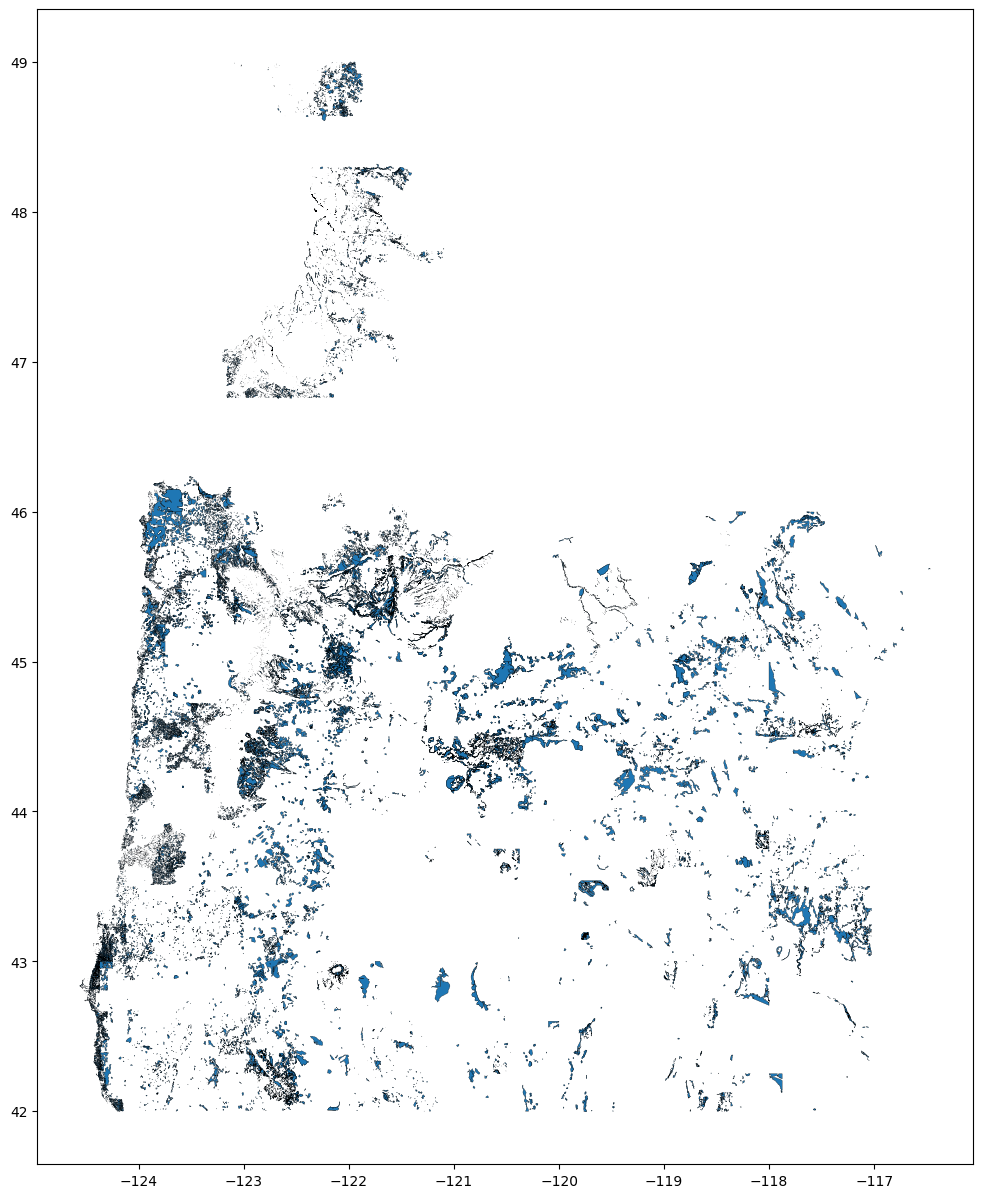

In [27]:
merged_landslides.plot(figsize=(15, 15), edgecolor="k", linewidth=0.2)

In [28]:
!pip install contextily

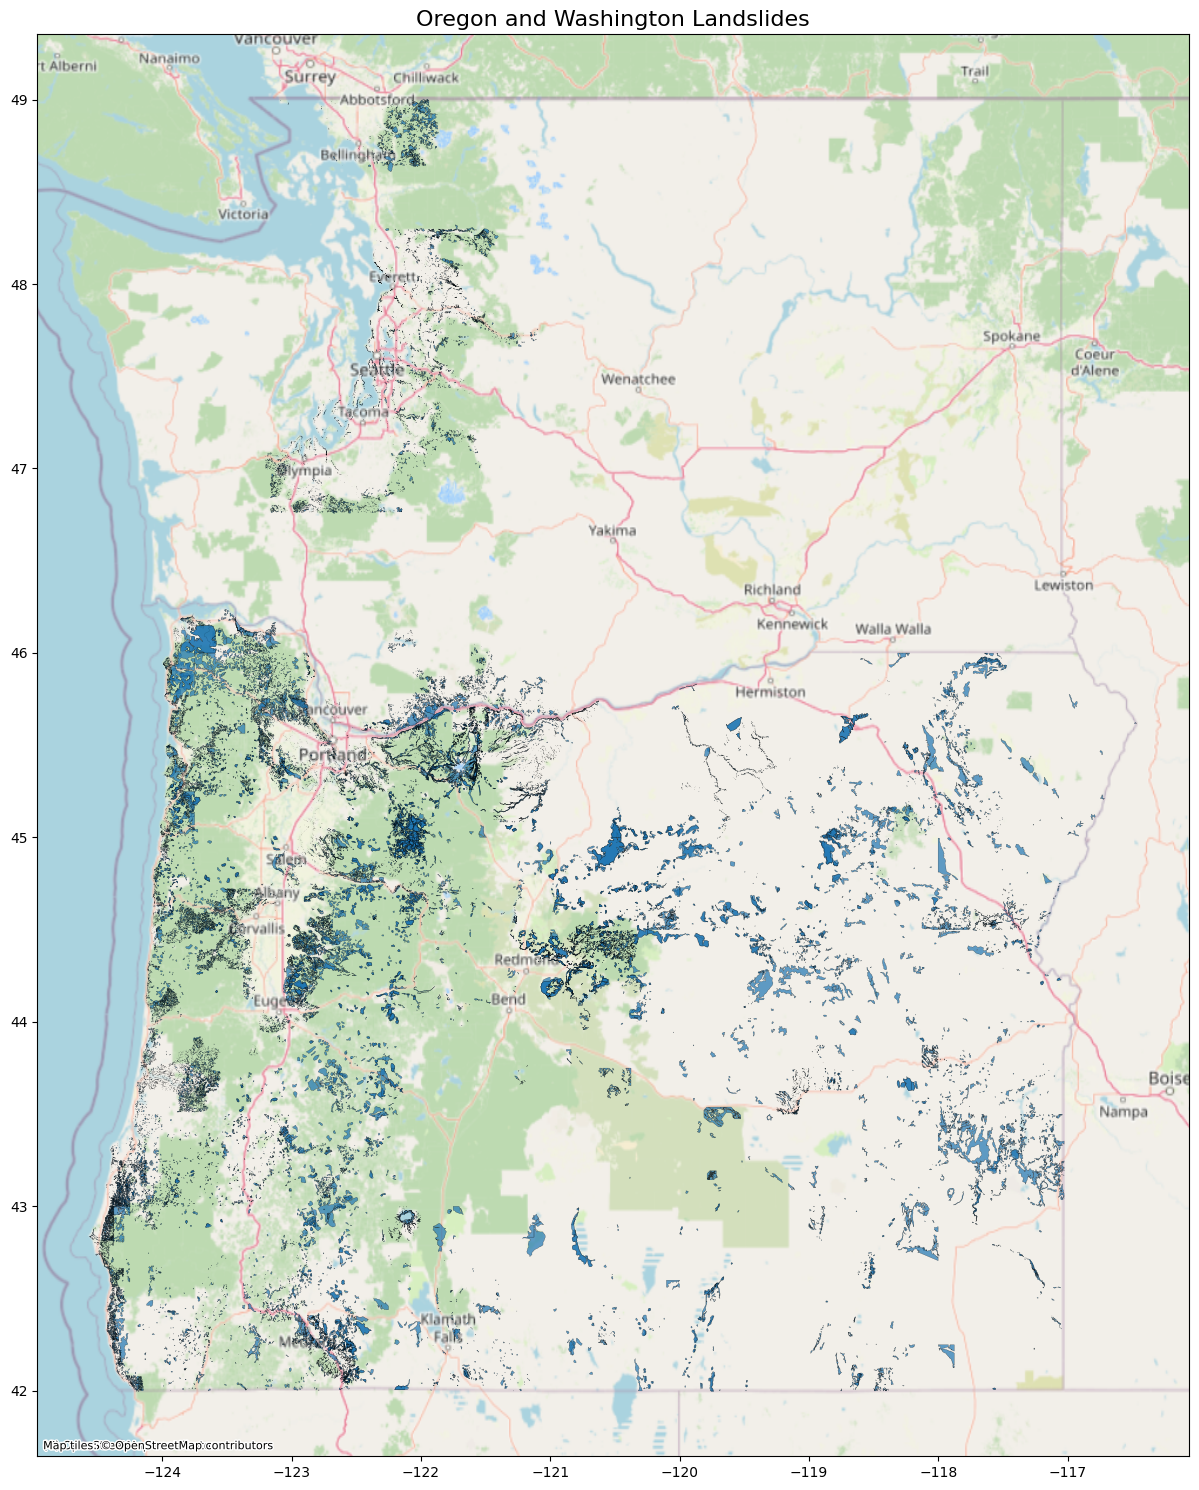

In [29]:
import contextily as ctx

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the landslides
merged_landslides.plot(ax=ax, edgecolor="k", linewidth=0.2, alpha=0.7)

# Add a basemap
ctx.add_basemap(ax, crs=merged_landslides.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add a title
plt.title('Oregon and Washington Landslides', fontsize=16)

# Add a scale bar
ctx.add_attribution(ax, "Map tiles: © OpenStreetMap contributors")

plt.tight_layout()
plt.show()